In [32]:
import pandas as pd
import numpy as np
import os,  sys
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.linear_model import LinearRegression

from mpl_toolkits import mplot3d

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from clean import PCBCCleaner, DrawPointAssayCleaner, DrawPointCoordCleaner

# import plotter

output_dir = "../outputs/grade_analysis_compare_dp_pcbc/"
SAVE = False

plt.rcParams.update(
    {
        'font.size': 18
    }
)

%matplotlib widget

# Data Input and Cleaning

In [2]:
pcbc_df = PCBCCleaner.get_processed_data()
assay_df = DrawPointAssayCleaner.get_processed_data()
dp_coords = DrawPointCoordCleaner.get_processed_data()

# Grouping

## PCBC

In [3]:
pcbc_dhids = list(pcbc_df['dhid'].unique())

pcbc_groups = {}

for dhid in pcbc_dhids:
    filtered_pcbc_df = pcbc_df.query('dhid == @dhid')
    pcbc_groups[dhid] = {}
    try:
        pcbc_groups[dhid] = (
            filtered_pcbc_df['weight'],
            filtered_pcbc_df['CU'],
            filtered_pcbc_df['AU']
        )
    except:
        print(f'Invalid data for {dhid}')

## DP Assay

In [4]:
assay_dhids = list(assay_df['dhid'].unique())

assay_groups = {}

for dhid in assay_dhids:
    filtered_assay_df = assay_df.query('dhid == @dhid')
    assay_groups[dhid] = {}
    try:
        assay_groups[dhid] = (
            filtered_assay_df['weight'],
            filtered_assay_df['CU'],
            filtered_assay_df['AU']
        )
    except:
        print(f'Invalid data for {dhid}')

# Output

## Functions

In [5]:
def calculated_linear_regression_parameters(x, y, w):
    # define predictor and response variables
    X = np.array(x)
    X = X.reshape(-1, 1)

    # create linear regression model
    model = LinearRegression()

    # fit regression model
    model.fit(X, y, w)
    r_squared = model.score(X, y, w)
    m, b = model.coef_[0], model.intercept_
    
    return m, b, r_squared

def plot_au_vs_cu(ax, w, x, y, dhid=None, min_s=2, max_s=298, alpha=1):
    min_w = min(w)
    max_w = max(w)
    cmap = plt.colormaps.get('copper')
    norm = colors.Normalize(vmin=min_w, vmax=max_w)

    s = (min_s + max_s * norm(w))

    # Graph
    ax.scatter(x, y, c=cmap(norm(w)), s=s, alpha=alpha)

    ax.set_xlim(0)
    ax.set_ylim(0)

    ax.set_xlabel('CU grade (%)')
    ax.set_ylabel('AU grade (ppm)') 

## PCBC Individuals

In [6]:
pcbc_lr_params = {}
assay_lr_params = {}

/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: Un

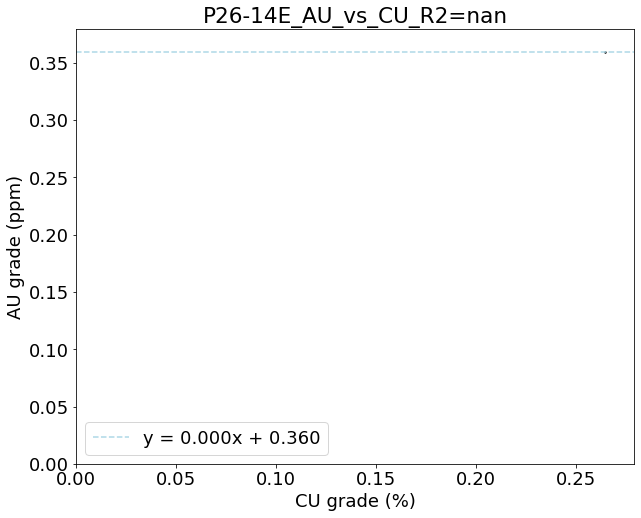

In [7]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot()

# Iterate over each drillhole
for dhid in pcbc_dhids:
    w, x, y = pcbc_groups[dhid]
    
    m, b, r_squared = calculated_linear_regression_parameters(x, y, w)
    pcbc_lr_params[dhid] = {
        'r2': r_squared,
        'm': m,
        'b': b
    }
    
    ax.cla()
    plot_au_vs_cu(ax, w, x, y, dhid=dhid)
    
    ax.set_title(f'{dhid}_AU_vs_CU_R2={r_squared:.2f}')
    ax.axline((0, b), slope=m, color='lightblue', ls='--', label=f'y = {m:.3f}x + {b:.3f}')
    ax.legend()
    
    if SAVE:
        save_loc = output_dir + f'{dhid}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'{dhid}_PCBC_R2={r_squared:.2f}.svg', format='svg')


# TODO: do not perform linear regression on drawpoints with fewer than 3 values
# TODO: compare PCBC and Assay linear regressions

## PCBC Master

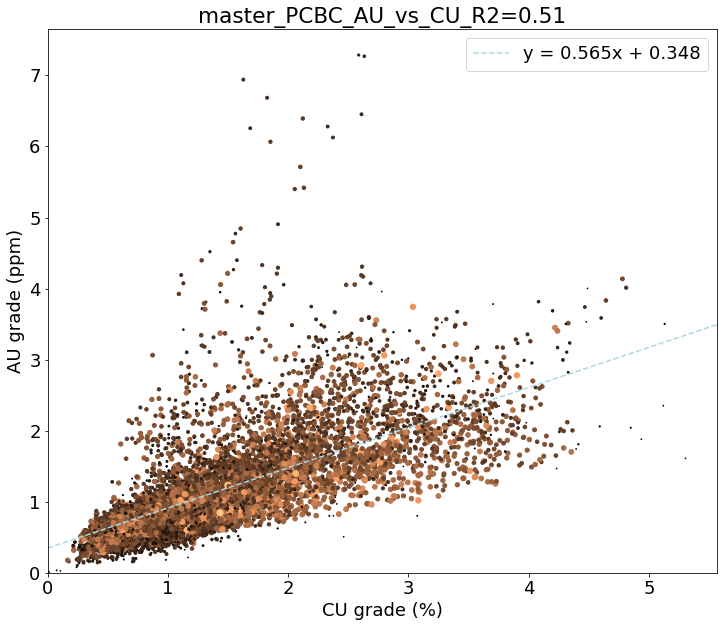

In [8]:
# Perform the same code but for the master dataset

fig = plt.figure()
fig.set_size_inches(12, 10)
ax = fig.add_subplot()

w, x, y = pcbc_df['weight'], pcbc_df['CU'], pcbc_df['AU']
m, b, r_squared = calculated_linear_regression_parameters(x, y, w)

ax.cla()
plot_au_vs_cu(ax, w, x, y, dhid=dhid, min_s=0.5, max_s=38)

ax.set_title(f'master_PCBC_AU_vs_CU_R2={r_squared:.2f}')
ax.axline((0, b), slope=m, color='lightblue', ls='--', label=f'y = {m:.3f}x + {b:.3f}')
ax.legend()

if SAVE:
    save_loc = output_dir + f'master/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    fig.savefig(save_loc + f'master_PCBC_R2={r_squared:.2f}.svg', format='svg')

## Assay Individuals

/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/benjaminwong/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


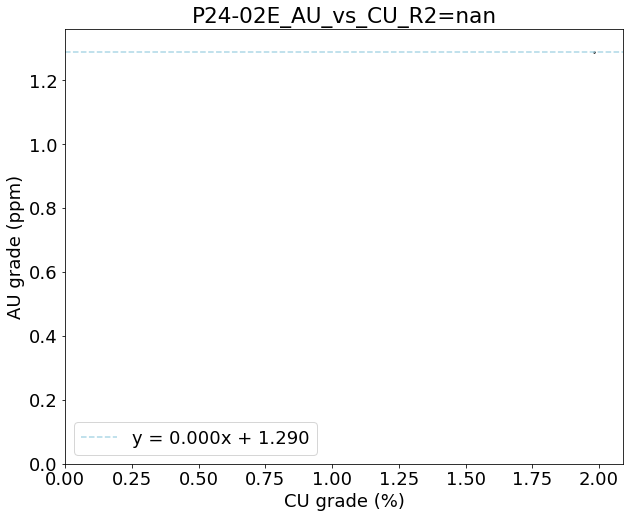

In [9]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot()

for dhid in assay_dhids:
    w, x, y = assay_groups[dhid]
    
    m, b, r_squared = calculated_linear_regression_parameters(x, y, w)
    assay_lr_params[dhid] = {
        'r2': r_squared,
        'm': m,
        'b': b
    }
    
    ax.cla()
    plot_au_vs_cu(ax, w, x, y, dhid=dhid)
    
    ax.set_title(f'{dhid}_AU_vs_CU_R2={r_squared:.2f}')
    ax.axline((0, b), slope=m, color='lightblue', ls='--', label=f'y = {m:.3f}x + {b:.3f}')
    ax.legend()
    
    if SAVE:
        save_loc = output_dir + f'{dhid}/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'{dhid}_DP_R2={r_squared:.2f}.svg', format='svg')

## Assay Master

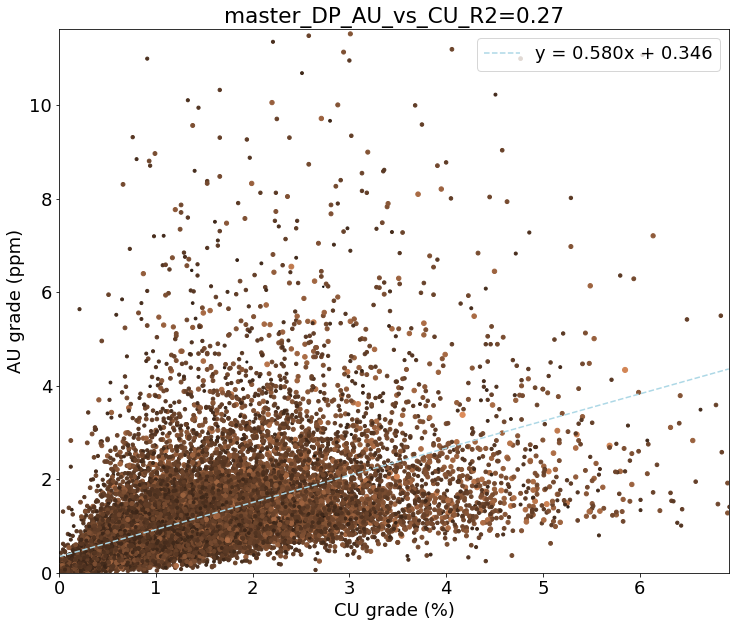

In [10]:
# Perform the same code but for the master dataset

fig = plt.figure()
fig.set_size_inches(12, 10)
ax = fig.add_subplot()

w, x, y = assay_df['weight'], assay_df['CU'], assay_df['AU']
m, b, r_squared = calculated_linear_regression_parameters(x, y, w)

ax.cla()
plot_au_vs_cu(ax, w, x, y, dhid=dhid, min_s=0.5, max_s=38)

ax.set_title(f'master_DP_AU_vs_CU_R2={r_squared:.2f}')
ax.axline((0, b), slope=m, color='lightblue', ls='--', label=f'y = {m:.3f}x + {b:.3f}')
ax.legend()

ax.set_xlim(0, np.percentile(x, 99.9))
ax.set_ylim(0, np.percentile(y, 99.9))

if SAVE:
    save_loc = output_dir + f'master/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    fig.savefig(save_loc + f'master_DP_R2={r_squared:.2f}.svg', format='svg')

# Additional Visualizations

In [11]:
pcbc_lr_params['P26-14E']

{'r2': nan, 'm': 0.0, 'b': 0.35983768105506897}

In [39]:
ms, bs, r2s = [], [], []
valid_dpids = []

for dpid, params in pcbc_lr_params.items():
    if not np.isnan(params['r2']):
        if not params['r2'] == 1.0:
            valid_dpids.append(dpid)
            r2s.append(params['r2'])
            bs.append(params['b'])
            ms.append(params['m'])

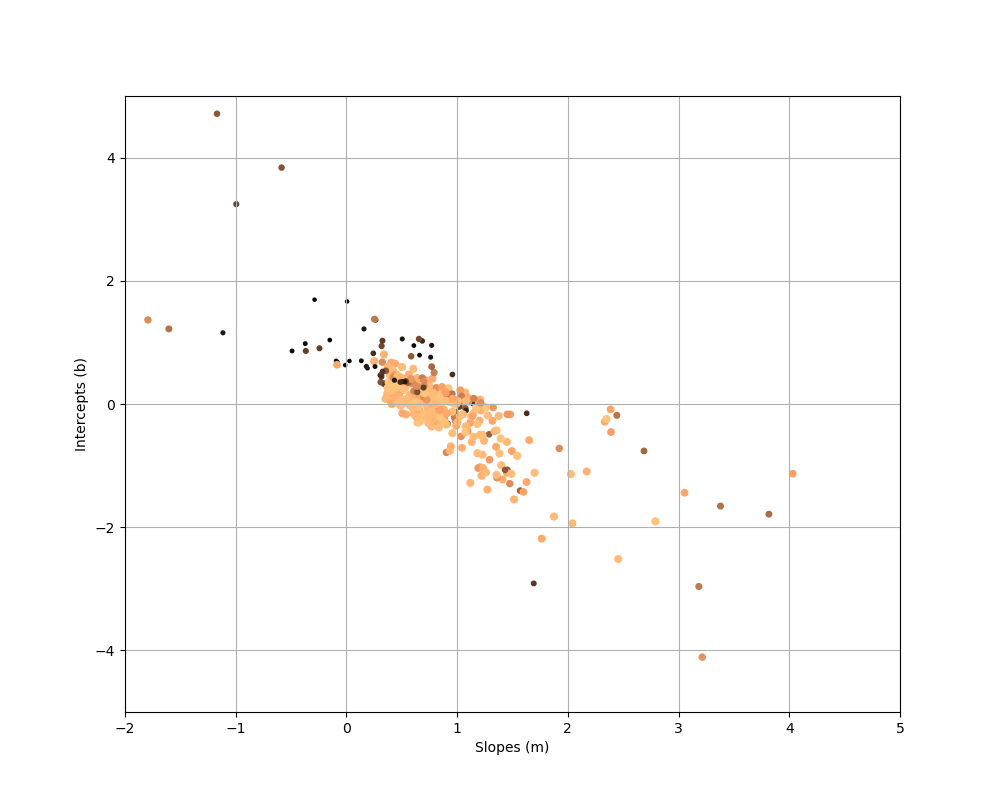

In [41]:
fig = plt.figure()
fig.set_size_inches(10, 8)
ax = fig.add_subplot()

cmap = plt.colormaps.get('copper')
norm = colors.Normalize(vmin=0, vmax=1)

s = 5 + 20 * norm(r2s)

# Graph
ax.scatter(ms, bs, c=cmap(r2s), s=s, alpha=1)
ax.set_xlim([-2, 5])
ax.set_ylim([-5, 5])

ax.set_ylabel('Intercepts (b)')
ax.set_xlabel('Slopes (m)')
ax.grid()

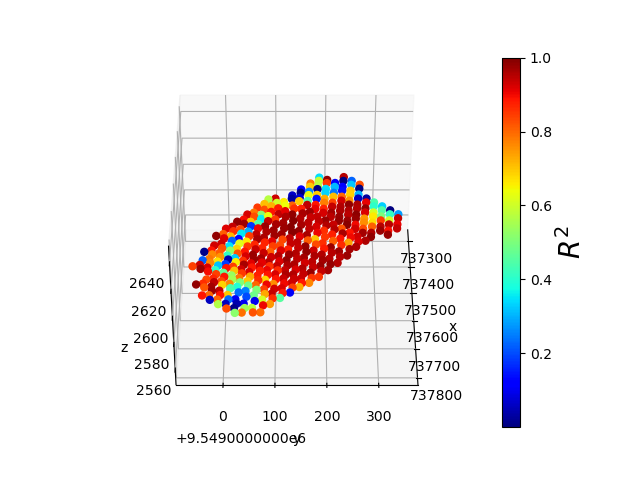

In [46]:
fig = plt.figure()
ax = plt.axes(projection='3d')

cmap = plt.colormaps.get('jet')

p = ax.scatter(
    [dp_coords.loc[dpid]['x'] for dpid in valid_dpids], 
    [dp_coords.loc[dpid]['y'] for dpid in valid_dpids],
    [dp_coords.loc[dpid]['z'] for dpid in valid_dpids], 
    c=[pcbc_lr_params[dpid]['r2'] for dpid in valid_dpids],
    vmax=1,
    cmap=cmap,
    s=25,
    alpha=1 # 0.4
)

ax.set_zlim([2550, 2650])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.azim = 0
ax.elev = 40

cbar = fig.colorbar(p)

cbar.set_label('$R^2$', fontsize=20)